In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import networkx as nx
import ast
import scipy
from scipy import stats

# PREPARO DOS DADOS

In [28]:
df = pd.read_excel('dados_brutos.xlsx')

In [29]:
orgs = df['organization_id']
users = df['user']
org_u = set(orgs)
dic_userPorOrg = {}
for i,org in enumerate(org_u):
    df_aux = df.loc[(df["organization_id"] == org),:]
    user_aux = df_aux["user"]
    dic_userPorOrg[org] = len(set(user_aux))


In [30]:
organizations = []
n_users = []
for k,v in dic_userPorOrg.items():
    organizations.append(k)
    n_users.append(v)

df_userPorOrg = pd.DataFrame({
    'organization_id': organizations,
    'N_users': n_users
})

df_userPorOrg = df_userPorOrg.sort_values(ascending=False, by='N_users').reset_index(drop=True)

In [31]:
dic_pathPorOrg = {}
paths_list_t = []
orgs = df_userPorOrg["organization_id"]

for org in orgs:
    path_aux = df.loc[(df["organization_id"] == org),(["path_actions"])]
    paths_list_u = []
    lista = [ast.literal_eval(paths[0]) for paths in path_aux.values]
    paths_list_u.extend((set(lista[0]))) #extend adiciona cada elemento da lista em paths_list
    paths_list_t.extend((lista[0])) #extend adiciona cada elemento da lista em paths_list_u
    dic_pathPorOrg[org] = (set(paths_list_u))

df_paths = pd.DataFrame()
df_paths['Count'] = pd.Series(paths_list_t).value_counts().values
df_paths['Actions'] = pd.Series(paths_list_t).value_counts().keys()

In [32]:
action_d = {}
novo_path_list = [0]*len(paths_list_t)
cont = 0
for i,path in enumerate(paths_list_t):
    if path not in action_d.keys():
        action_d[path] = cont
        cont += 1

for i,path in enumerate(paths_list_t):
    novo_path_list[i] = action_d[path]

# ANÁLISE EXPLORATÓRIA

In [33]:
mean = np.mean(novo_path_list)
median = np.median(novo_path_list)
mode = stats.mode(novo_path_list)
dp = np.std(novo_path_list)
print(f'Mean: {mean}, median: {median}, mode: {mode}, dp: {dp}')

Mean: 5.087479935794542, median: 3.0, mode: ModeResult(mode=array([3]), count=array([643])), dp: 6.739861578601938


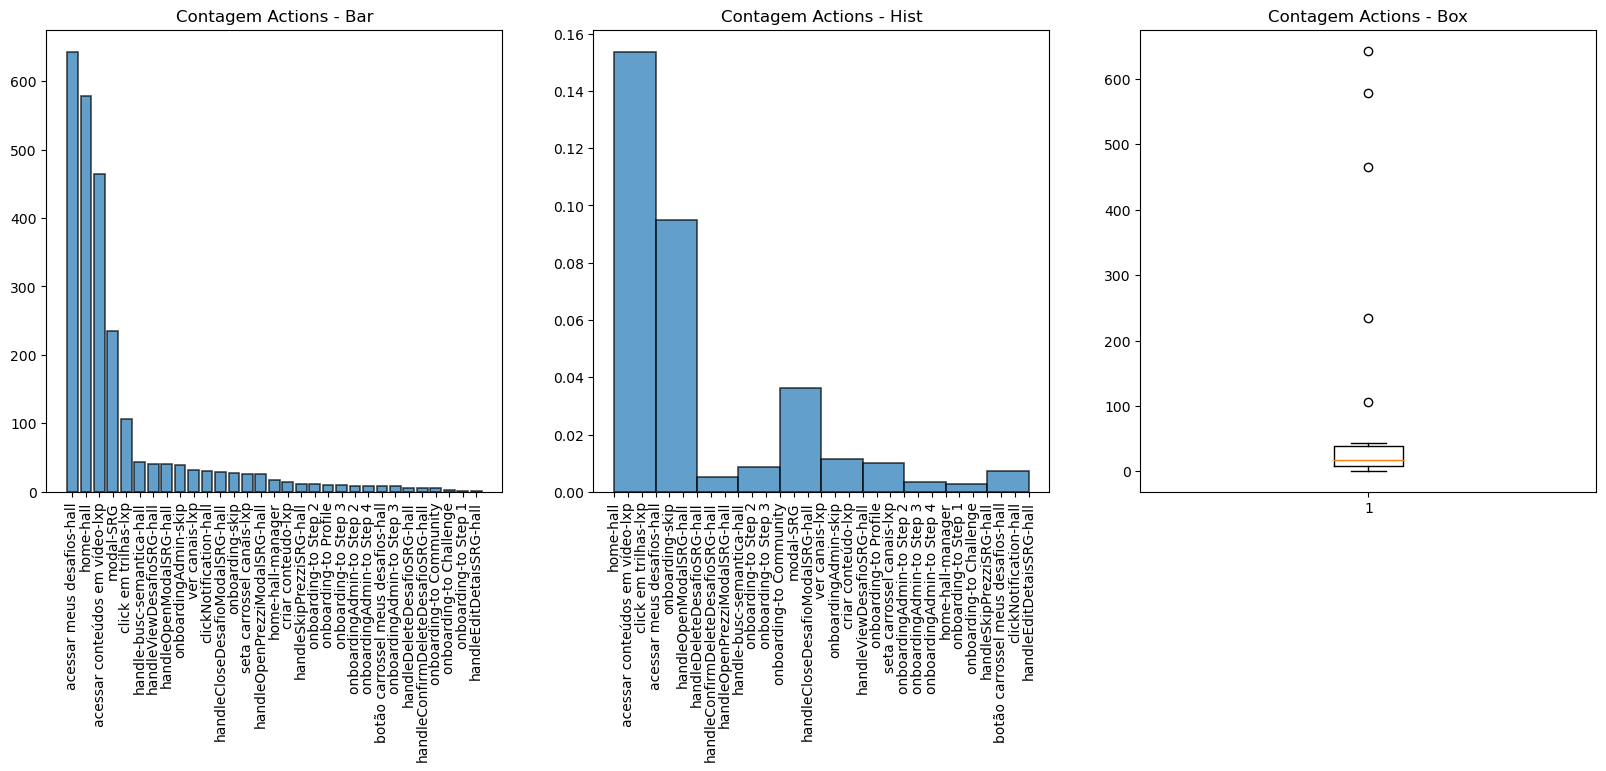

In [34]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.bar(df_paths['Actions'], df_paths['Count'], edgecolor='black', linewidth=1.2, alpha=0.7)
plt.xticks(rotation=90)
plt.title('Contagem Actions - Bar')

plt.subplot(1,3,2)
plt.hist(paths_list_t, edgecolor='black', linewidth=1.2, alpha=0.7, density=True)
plt.xticks(rotation=90)
plt.title('Contagem Actions - Hist')

plt.subplot(1,3,3)
plt.boxplot(df_paths['Count'])
plt.title('Contagem Actions - Box')
plt.show()

In [35]:
organizations2 = []
paths = []
for k,v in dic_pathPorOrg.items():
    organizations2.append(k)
    paths.append(v)

df_pathPorOrg = pd.DataFrame({
    'organization_id': organizations2,
    'Paths': paths
})

In [36]:
df_pathPorOrg.head(20)

,organization_id,Paths
0,4f3e63d2-43f8-4886-addc-9ce039eab5f1,"{acessar conteúdos em vídeo-lxp, click em tril..."
1,4adb5f9b-f50a-4957-a7e3-94c3452d877c,"{acessar conteúdos em vídeo-lxp, home-hall, ac..."
2,d3400673-a5b2-4914-bf57-ce98dc710603,"{handleConfirmDeleteDesafioSRG-hall, handleDel..."
3,c81fa8b0-52c0-4a31-abb7-6776a76cc9c8,"{acessar conteúdos em vídeo-lxp, click em tril..."
4,9e3e7a95-c6f5-4b6f-b189-8f33e45ee425,"{home-hall, handle-busc-semantica-hall, acessa..."
5,347ceb13-8656-4ed0-b080-c6cfb5528b25,{home-hall}
6,50ca2381-2d91-4d7e-8300-bb625d5cb97f,"{acessar conteúdos em vídeo-lxp, home-hall, ac..."
7,abba8235-15bd-4285-90b4-104e9308013e,"{onboarding-to Step 2, onboarding-to Step 3, o..."
8,c8c88852-b101-4b47-aaca-4cee45368c9f,"{modal-SRG, handleCloseDesafioModalSRG-hall, a..."
9,6019ee26-09c3-422e-8c25-0abe878d1a73,"{acessar conteúdos em vídeo-lxp, ver canais-lx..."


In [37]:
x = np.linspace(0,30,1001)
fx = (stats.norm.pdf(x, loc=mean, scale=dp))

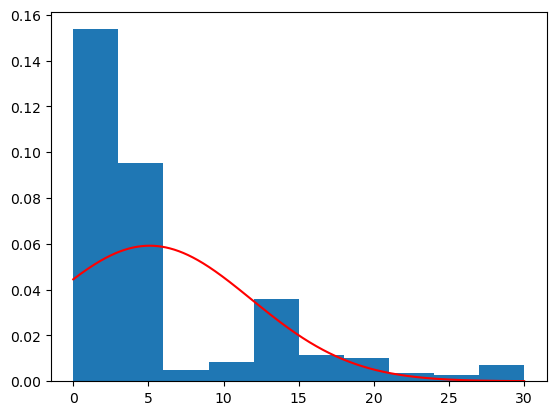

In [38]:
plt.hist(novo_path_list, density=True)
plt.plot(x, fx, color='red')
plt.show()

In [39]:
testando = df['path_actions']
actions = pd.DataFrame({ 'from':[], 'to':[], 'value':[]})
from_ = list(actions['from'])
to_ = list(actions['to'])
value_ = []
counts = {}

In [40]:
for lista in testando:
    lista_x = ast.literal_eval(lista)
    len_lista = len(lista_x)
    for i,e in enumerate(ast.literal_eval(lista)):
        if i + 1 < len_lista:
            # print(e)
            # print(ast.literal_eval(lista)[i+1])
            # print('---')
            e_1 = ast.literal_eval(lista)[i+1]

            from_.append(e)
            to_.append(e_1)

            if (e,e_1) not in counts.keys():
                counts[(e,e_1)] = 1
            else:
                counts[(e,e_1)] += 1
actions['from'] = from_
actions['to'] = to_


for lista in testando:
    lista_x = ast.literal_eval(lista)
    len_lista = len(lista_x)
    for i,e in enumerate(ast.literal_eval(lista)):
        if i + 1 < len_lista:
            # print(e)
            # print(ast.literal_eval(lista)[i+1])
            # print('---')
            e_1 = ast.literal_eval(lista)[i+1]
            value_.append(int((counts[(e, e_1)])/(max(counts.values())/10)))
actions['value'] = value_


In [41]:
max(counts.values())

4677

In [42]:
actions

,from,to,value
0,home-hall,acessar meus desafios-hall,3
1,acessar meus desafios-hall,handleViewDesafioSRG-hall,1
2,handleViewDesafioSRG-hall,home-hall,0
3,home-hall,acessar conteúdos em vídeo-lxp,3
4,acessar conteúdos em vídeo-lxp,click em trilhas-lxp,3
...,...,...,...
33714,acessar conteúdos em vídeo-lxp,click em trilhas-lxp,3
33715,click em trilhas-lxp,home-hall,0
33716,home-hall,acessar conteúdos em vídeo-lxp,3
33717,acessar conteúdos em vídeo-lxp,click em trilhas-lxp,3


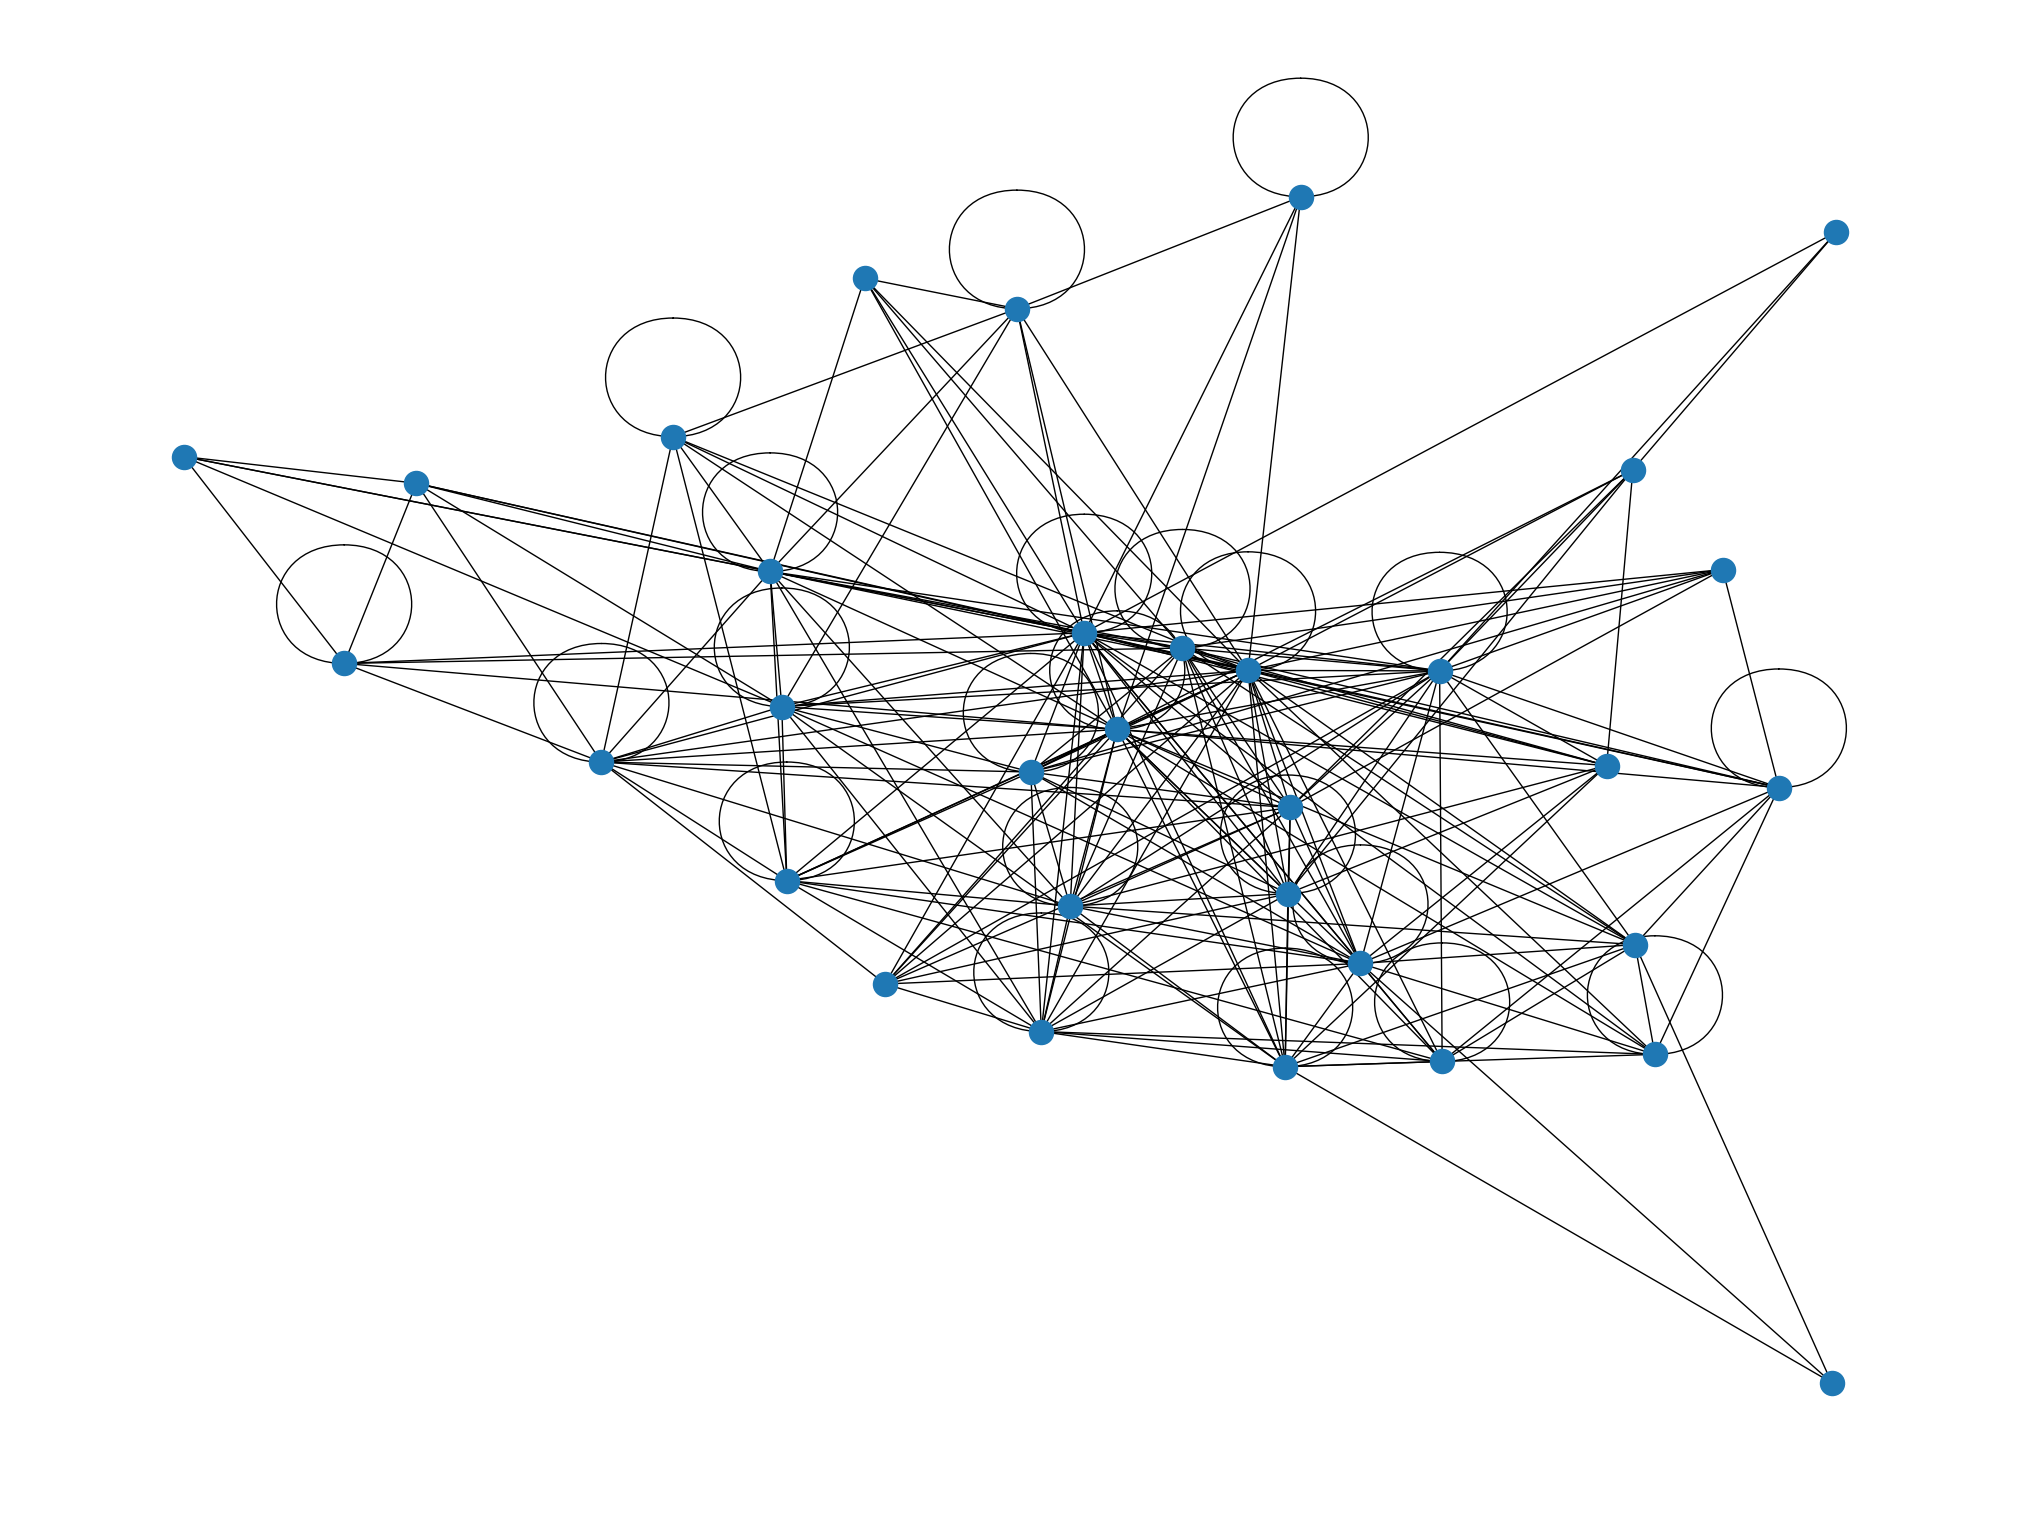

In [43]:
plt.figure(figsize=(20,15))
G = nx.from_pandas_edgelist(actions, 'from', 'to')

nx.draw(G, with_labels=False) #add cores e frequencia
plt.show()


In [44]:
# # libraries
# import pandas as pd
# import numpy as np
# import networkx as nx
# import matplotlib.pyplot as plt
 
# # Build a dataframe with your connections
# df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C'], 'value':[1, 10, 5, 5]})
 
# # Build your graph
# G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# # Custom the nodes:
# nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color=df['value'], width=10.0, edge_cmap=plt.cm.Blues)

# MONTE CARLO

### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## TESTANDO

In [45]:
medias = []

for i in range(0,50000):
    l_aux = random.choices(novo_path_list, k=2000)
    # l_aux = np.random.normal(loc=mean, scale=dp, size=20)
    medias.append(np.mean(l_aux))


mm = np.mean(medias)
upper = np.quantile(medias, 0.975)
lower = np.quantile(medias, 0.025)
print(mm, lower, upper)


5.08875674 4.795 5.388


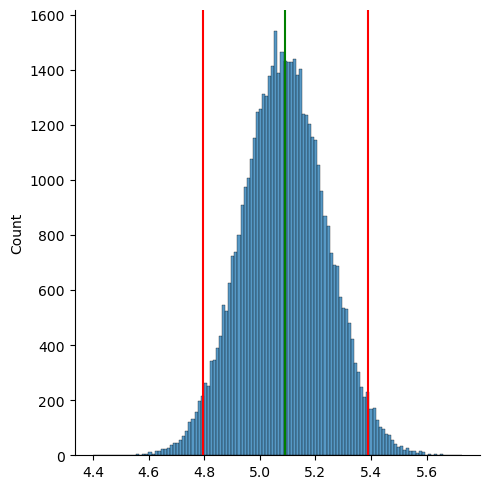

In [46]:
sns.displot(medias)

plt.axvline(lower, color='red')
plt.axvline(upper, color='red')
plt.axvline(mm, color='green')
plt.show()



## COMEÇO

In [127]:
originais = pd.read_excel('caminhos_originais.xlsx')
path_actions = df['path_actions']
contagem = {}
caminhos = originais['caminho']
repetidos = []
i = 0
for caminho in caminhos:
    for path in path_actions:
        if path == caminho:
            if originais['nome_caminho'][i] not in contagem.keys():
                contagem[originais['nome_caminho'][i]] = 1
            else:
                contagem[originais['nome_caminho'][i]] += 1
            repetidos.append(originais['nome_caminho'][i])
    i += 1
originais['contagem'] = contagem.values()

In [81]:
originais

,Unnamed: 0,nome_caminho,caminho,contagem
0,0,caminho_0,"['home-hall', 'acessar conteúdos em vídeo-lxp'...",30
1,1,caminho_1,"['onboardingAdmin-skip', 'home-hall', 'acessar...",16
2,2,caminho_4,"['home-hall', 'acessar meus desafios-hall', 'h...",24
3,3,caminho_5,"['home-hall', 'acessar conteúdos em vídeo-lxp'...",213
4,4,caminho_6,"['home-hall', 'acessar conteúdos em vídeo-lxp']",23
...,...,...,...,...
59,59,caminho_70,"['home-hall', 'acessar conteúdos em vídeo-lxp'...",4
60,60,caminho_71,"['home-hall', 'acessar conteúdos em vídeo-lxp'...",5
61,61,caminho_72,"['home-hall', 'home-hall', 'acessar meus desaf...",6
62,62,caminho_73,"['home-hall', 'clickNotification-hall', 'home-...",4


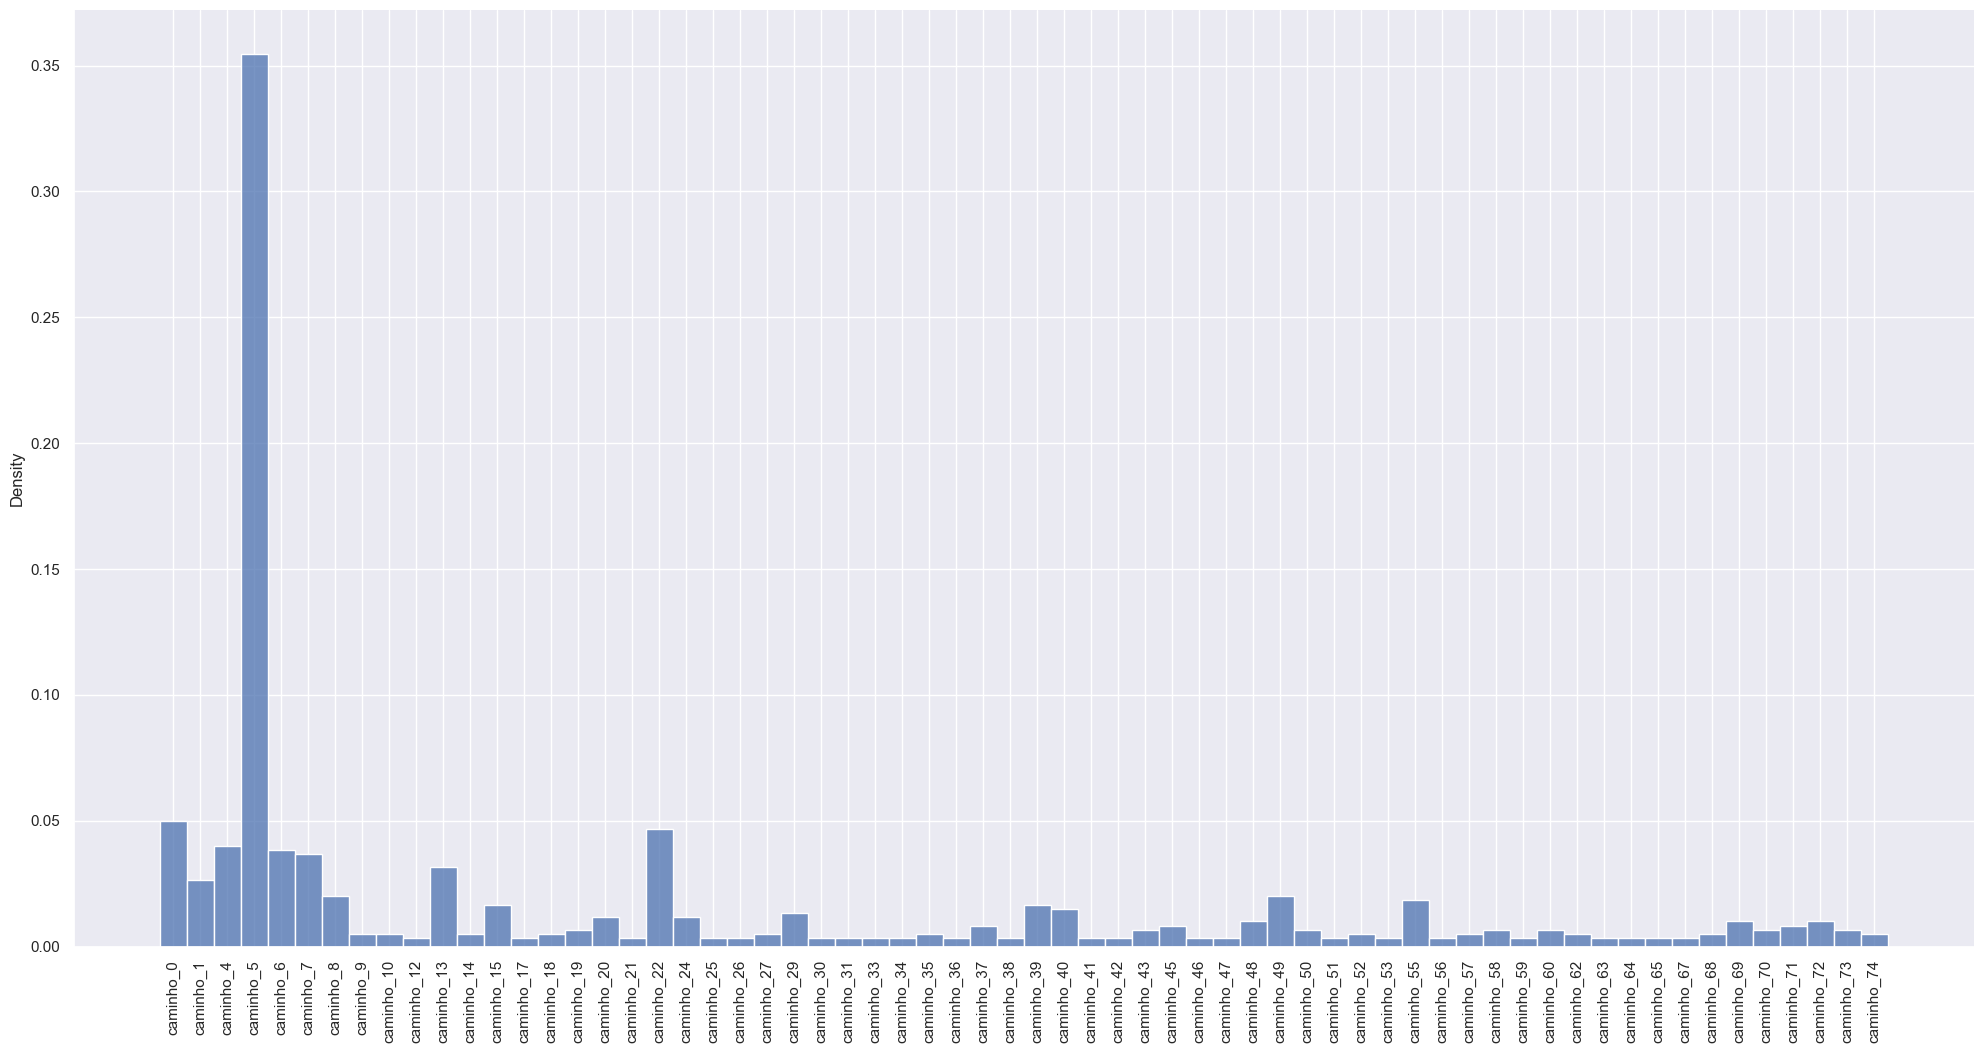

In [117]:
sns.set_theme(rc={
    
})
sns.displot(repetidos, height=10, aspect=2, kind='hist', stat='density')
plt.xticks(rotation=90)
plt.show()
